In [24]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [25]:
dataset = pd.read_csv("Dados_Ies_Novas_Categorias_utf8.csv", index_col=0, encoding="latin-1")
print(dataset)

      NUM_CURSOS  CODIGO_IES TIPO_CATEGORIA_ADM        REGIAO  \
0            114           1           Nacional  Centro-Oeste   
1            149           2           Nacional  Centro-Oeste   
2            116           3           Nacional      Nordeste   
3            107           4           Nacional         Norte   
4            100           5           Nacional      Nordeste   
...          ...         ...                ...           ...   
2601           2       23700       Sub-Nacional       Sudeste   
2602           2       23705       Sub-Nacional       Sudeste   
2603           1       23713       Sub-Nacional       Sudeste   
2605           1       23867       Sub-Nacional       Sudeste   
2607           1       24672       Sub-Nacional       Sudeste   

                    UF  DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  \
0          Mato Grosso                92.0                  58.0   
1     Distrito Federal                39.0                  32.0   
2              

# 1.0 Selecionando features

### 1.0.1 Transformando strings em ints para serem usados como features

In [30]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

le.fit(dataset["REGIAO"])
dataset["REGIAO"]=le.transform(dataset["REGIAO"])
le_name_mapping_2 = dict(zip(le.classes_, le.transform(le.classes_)))

le.fit(dataset["UF"])
dataset["UF"]=le.transform(dataset["UF"])
le_name_mapping_3 = dict(zip(le.classes_, le.transform(le.classes_)))

def np_encoder(object):
    if isinstance(object, np.generic):
        return object.item()

import json
b = json.dumps(le_name_mapping_2, default=np_encoder, indent=True, ensure_ascii=False)
c = json.dumps(le_name_mapping_3, default=np_encoder, indent=True, ensure_ascii=False)

ff = '{'
ff += f'\n"REGIAO": [\n{b}\n],\n"UF": [\n{c}\n]'
ff += '\n}'

f = open("mapa_categorias.json", "w")
f.write(ff)
f.close()

dataset.head()

,NUM_CURSOS,CODIGO_IES,TIPO_CATEGORIA_ADM,REGIAO,UF,DEFICIENCIA_FISICA,DEFICIENCIA_AUDITIVA,DEFICIENCIA_VISUAL,DEFICIENCIA_COGNITIVA,DEFICIENCIA_MULTIPLA,RECURSOS_DEF_FISICA,RECURSOS_DEF_VISUAL,RECURSOS_DEF_AUDITIVA,RECURSOS_DEF_COGNITIVA,RECURSOS_DEF_MULTIPLA
0,114,1,Nacional,0,10,92.0,58.0,44.0,17.0,2.0,0.271930,0.429825,0.938596,0.201754,0.201754
1,149,2,Nacional,0,6,39.0,32.0,27.0,32.0,8.0,2.778523,4.167785,3.704698,1.852349,1.852349
2,116,3,Nacional,1,24,190.0,56.0,94.0,16.0,2.0,0.775862,1.215517,1.793103,0.534483,0.534483
3,107,4,Nacional,2,3,64.0,33.0,54.0,60.0,2.0,0.000000,0.000000,0.719626,0.000000,0.000000
4,100,5,Nacional,1,17,137.0,50.0,73.0,36.0,3.0,4.200000,5.880000,5.880000,2.520000,2.520000


### 1.1.0 Separando os dados e as features de treinamento e teste

In [31]:
X = dataset.drop(columns=[
                          "TIPO_CATEGORIA_ADM",
                          "CODIGO_IES",
                          "NUM_CURSOS",
                          "REGIAO",
                          "UF"
                          ])
y = dataset["TIPO_CATEGORIA_ADM"].values

feature_cols = [
                "DEFICIENCIA_FISICA",
                "DEFICIENCIA_VISUAL",
                "DEFICIENCIA_COGNITIVA",
                "DEFICIENCIA_AUDITIVA",
                "DEFICIENCIA_MULTIPLA",
                "RECURSOS_DEF_FISICA",
                "RECURSOS_DEF_VISUAL",
                "RECURSOS_DEF_COGNITIVA",
                "RECURSOS_DEF_AUDITIVA",
                "RECURSOS_DEF_MULTIPLA"
                ]

print(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1) #60% para treino e 40% para teste

      DEFICIENCIA_FISICA  DEFICIENCIA_AUDITIVA  DEFICIENCIA_VISUAL  \
0                   92.0                  58.0                44.0   
1                   39.0                  32.0                27.0   
2                  190.0                  56.0                94.0   
3                   64.0                  33.0                54.0   
4                  137.0                  50.0                73.0   
...                  ...                   ...                 ...   
2601                 0.0                   0.0                 1.0   
2602                 1.0                   0.0                 0.0   
2603                 1.0                   0.0                 0.0   
2605                 1.0                   0.0                 0.0   
2607                 1.0                   0.0                 0.0   

      DEFICIENCIA_COGNITIVA  DEFICIENCIA_MULTIPLA  RECURSOS_DEF_FISICA  \
0                      17.0                   2.0             0.271930   
1          

# 2.0 Gerando a árvore de decisão com o Sklearn

### 2.1.0 Classificação pelo método "gini"

In [32]:
da = DecisionTreeClassifier(criterion="gini", max_depth=3)
da = da = DecisionTreeClassifier()

da = da.fit(X_train, y_train)

y_pred = da.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.723404255319149
Precision: 0.7213345864661653
Recall: 0.723404255319149


### 2.2.0 Otimizando a classificação por árvore de decisão pelo critério de "entropy"

In [33]:
dao = DecisionTreeClassifier(criterion="entropy", max_depth=3)

dao = dao.fit(X_train, y_train)

y_pred = dao.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='weighted'))

Accuracy: 0.7340425531914894
Precision: 0.7448228255867464
Recall: 0.7340425531914894


# 3.0 Visualizando a árvore

Instalando bibliotecas adicionais necessárias

In [ ]:
#!pip install six

Importando bibliotecas

In [34]:
from sklearn.tree import export_graphviz
from six import StringIO #from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

### 3.1.0 Visualização da árvore não otimizada

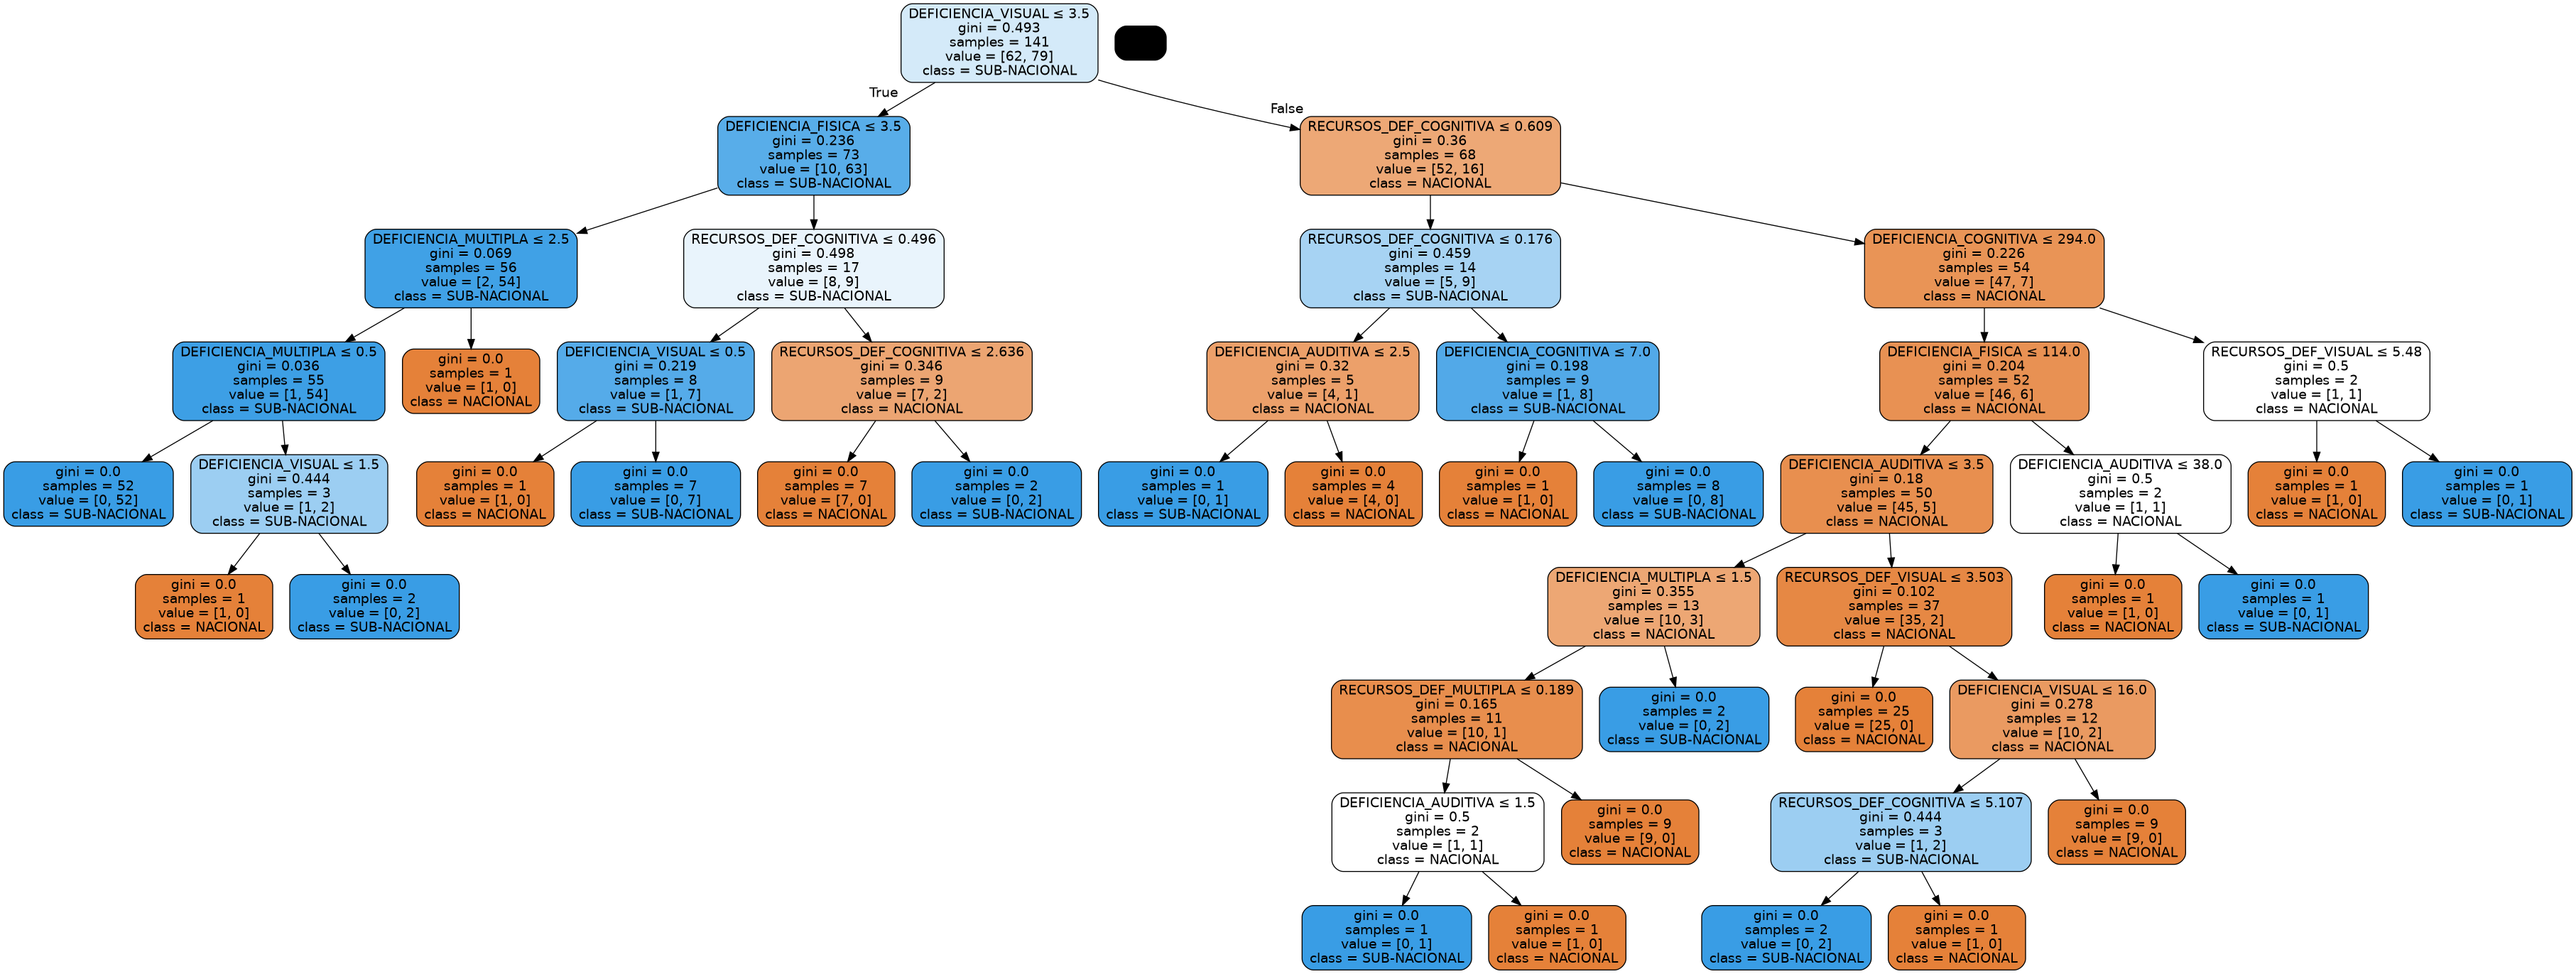

In [35]:
ddata = DecisionTreeClassifier(criterion="entropy", max_depth=3)
ddata = StringIO()
export_graphviz(
                da, 
                out_file=ddata, 
                filled=True, 
                rounded=True, 
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=["NACIONAL", "SUB-NACIONAL"]
                )
graph = pydotplus.graph_from_dot_data(ddata.getvalue())
graph.write_png("categoria_administrativa.png")
Image(graph.create_png())

### 3.2.0 Visualização da árvore otimizada

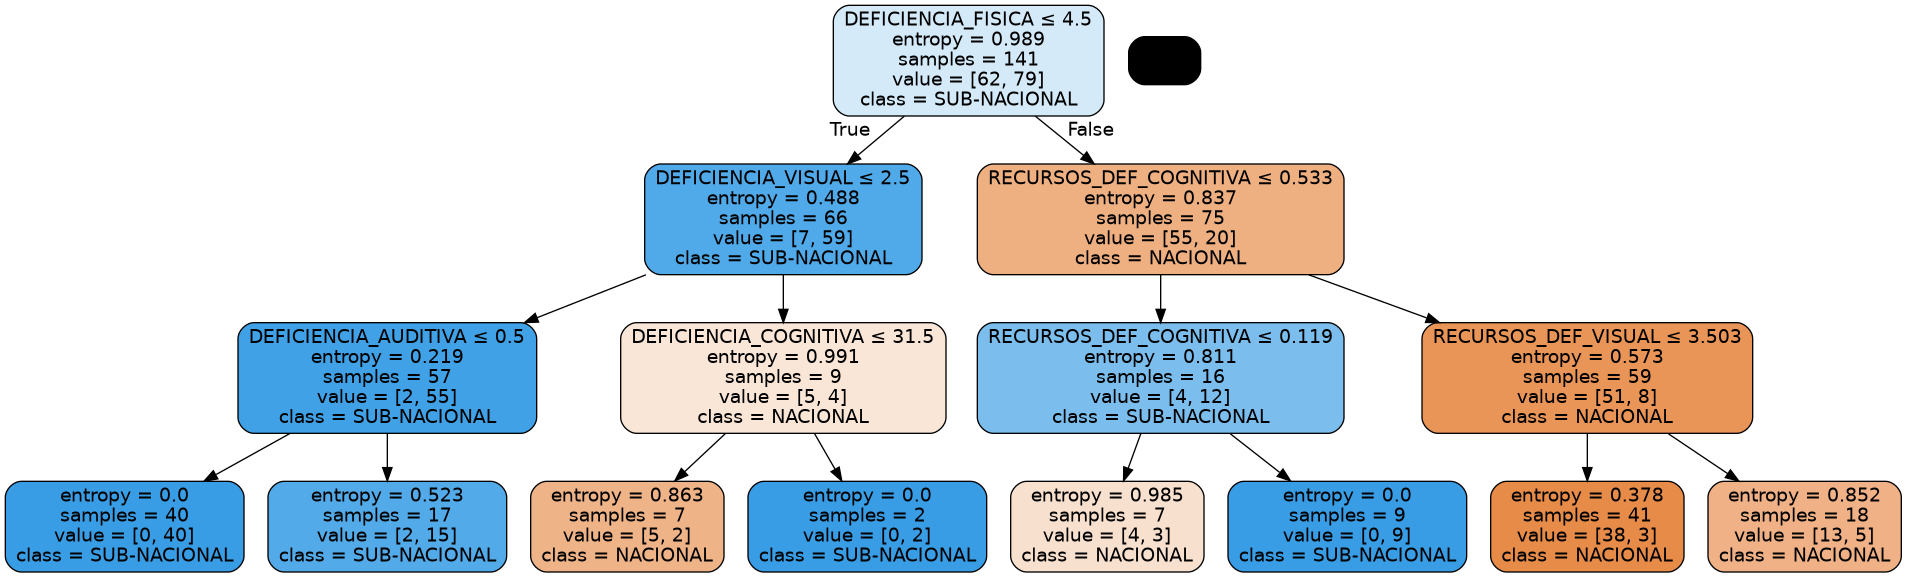

In [36]:
oddata = DecisionTreeClassifier(criterion="entropy", max_depth=2)
oddata = StringIO()
export_graphviz(
                dao, 
                out_file=oddata, 
                filled=True, 
                rounded=True, 
                special_characters=True, 
                feature_names=feature_cols, 
                class_names=["NACIONAL", "SUB-NACIONAL"]
                )
graph = pydotplus.graph_from_dot_data(oddata.getvalue())
graph.write_png("categoria_administrativa.png")
Image(graph.create_png())

# 4.0 Usando o feature importance

In [ ]:
pd.crosstab([oddata['Warm-blooded'],oddata['Gives Birth']],oddata['Class'])

In [37]:
from sklearn import tree

Y = dataset['TIPO_CATEGORIA_ADM']
X = dataset.drop(["REGIAO","TIPO_CATEGORIA_ADM"], axis=1)

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
clf = clf.fit(X, Y)

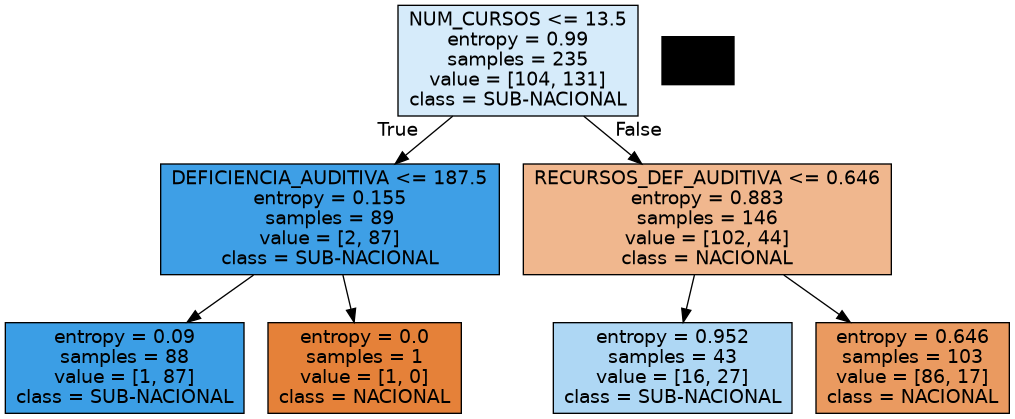

In [38]:
import pydotplus 
from IPython.display import Image

dot_data = tree.export_graphviz(clf, feature_names=X.columns, class_names=['NACIONAL','SUB-NACIONAL'], filled=True, 
                                out_file=None) 
graph = pydotplus.graph_from_dot_data(dot_data) 
Image(graph.create_png())

### 4.1.0 Visualizando features da árvore não otimizada

In [39]:
features_dict= {}
for col, val in sorted(zip(X_train.columns, da.feature_importances_), key=lambda x:x[1], reverse=True):
  features_dict[col] = val

features_df = pd.DataFrame({'Feature':features_dict.keys(),'Importance': features_dict.values()})

features_df

,Feature,Importance
0,DEFICIENCIA_AUDITIVA,0.472509
1,RECURSOS_DEF_AUDITIVA,0.244138
2,DEFICIENCIA_FISICA,0.079855
3,DEFICIENCIA_MULTIPLA,0.076589
4,DEFICIENCIA_COGNITIVA,0.060465
5,DEFICIENCIA_VISUAL,0.033790
6,RECURSOS_DEF_VISUAL,0.020877
7,RECURSOS_DEF_MULTIPLA,0.011777
8,RECURSOS_DEF_FISICA,0.000000
9,RECURSOS_DEF_COGNITIVA,0.000000


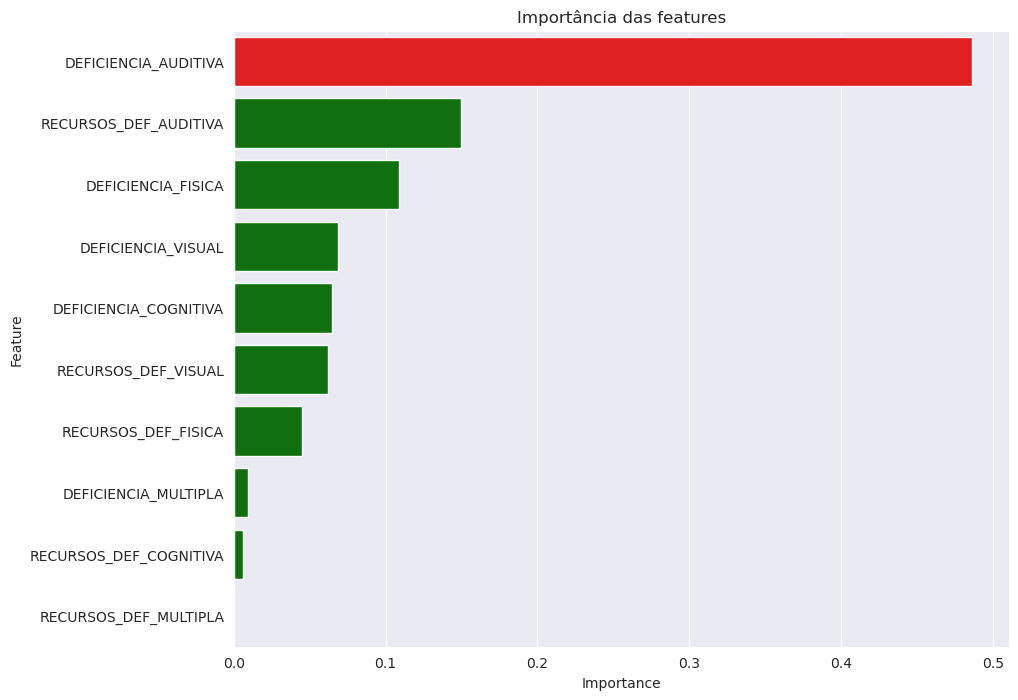

<Figure size 640x480 with 0 Axes>

In [12]:
vals = features_df.Importance
id = features_df.Feature
plt.figure(figsize=(10, 8))
c = ['green' if (x < max(vals)) else 'red' for x in vals]
sns.barplot(y=id, x=vals, palette=c).set(title="Importância das features")
plt.show()
plt.savefig(fname="Feature importance gini.png")

### 4.2.0 Visualizando features da árvore otimizada

In [40]:
ofeatures_dict= {}
for col, val in sorted(zip(X_train.columns, dao.feature_importances_), key=lambda x:x[1], reverse=True):
  ofeatures_dict[col] = val

ofeatures_df = pd.DataFrame({'Feature': ofeatures_dict.keys(),'Importance': ofeatures_dict.values()})

ofeatures_df

,Feature,Importance
0,DEFICIENCIA_FISICA,0.513039
1,RECURSOS_DEF_AUDITIVA,0.254051
2,DEFICIENCIA_AUDITIVA,0.124129
3,DEFICIENCIA_COGNITIVA,0.041631
4,RECURSOS_DEF_VISUAL,0.034022
5,DEFICIENCIA_VISUAL,0.033128
6,DEFICIENCIA_MULTIPLA,0.000000
7,RECURSOS_DEF_FISICA,0.000000
8,RECURSOS_DEF_COGNITIVA,0.000000
9,RECURSOS_DEF_MULTIPLA,0.000000


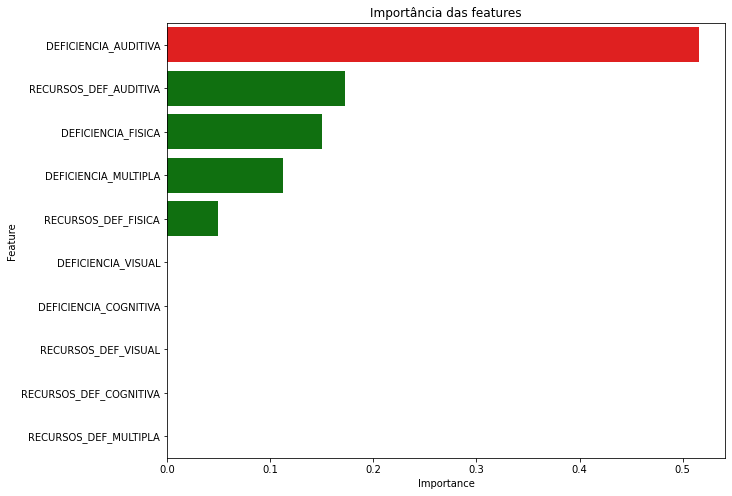

<Figure size 432x288 with 0 Axes>

In [ ]:
vals = ofeatures_df.Importance
id = ofeatures_df.Feature
plt.figure(figsize=(10, 8))
c = ['green' if (x < max(vals)) else 'red' for x in vals]
sns.barplot(y=id, x=vals, palette=c).set(title="Importância das features")
plt.show()
plt.savefig(fname="Feature importance entropy.png")

In [55]:
estado_civil = [0,1,0,1,0]
renda = [2000,5000,1000,20.00,40.000]
aprovado = [0,1,0,1,1]
df_aprovacao = pd.DataFrame({'estado_civil':estado_civil,
              'renda mensal':renda,'aprovado':aprovado})



In [42]:
X = df_aprovacao.iloc[:,:2]
y = df_aprovacao.iloc[:,-1]

In [47]:
#clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=2)
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= 520.0\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.5, 'x[1] <= 3500.0\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

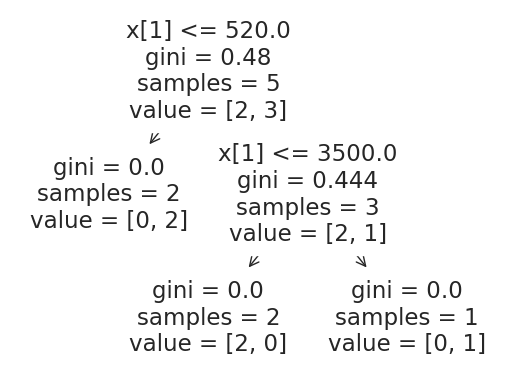

In [54]:
tree.plot_tree(clf)

In [56]:
resultado = clf.predict([[1,10.000]])

/home/selvarpv/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
print(resultado)

[1]
